<a href="https://colab.research.google.com/github/abhi99-ut/aih/blob/main/Final_Clean_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
# @title Import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud import bigquery
from IPython.display import display, HTML

import networkx as nx

# Authenticate and set up the BigQuery client
from google.colab import auth
auth.authenticate_user()

# Set up BigQuery Client with project ID
project_id = "abhishek-project-001"  # Replace with your project ID
client = bigquery.Client(project=project_id)

# Optional: Make pandas DataFrames display better in notebook format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


In [67]:
# @title Utils Code

# Function to fetch data from BigQuery or CSV if available locally
def load_data(table_name, csv_path):
    """
    Load data from BigQuery or CSV if available locally.
    """
    try:
        # Try loading the data from the local CSV file
        df = pd.read_csv(csv_path)
        print(f"Data loaded from {csv_path}")
    except FileNotFoundError:
        # If the file is not found, query the data from BigQuery
        print(f"CSV not found. Querying {table_name} from BigQuery...")
        df = get_data(table_name)
    except Exception as e:
        print(f"Error loading data: {e}")
        df = None
    return df

# Function to query data from BigQuery
def get_data(table_name):
    query = f"""
    SELECT *
    FROM `physionet-data.mimiciii_clinical.{table_name}`
    """
    df = client.query(query).to_dataframe()
    return df

# null proportion
def null_proportion(df):

    null_percent = df.isnull().mean() * 100

    return null_percent

In [68]:
# @title Load datasets

# Admissions Data
admissions = load_data(table_name="admissions", csv_path="/content/drive/MyDrive/mimic/admissions.csv")
display(admissions.head())

# Example: Load Patients Data
patients = load_data(table_name="patients", csv_path="/content/drive/MyDrive/mimic/patients.csv")
display(patients.head())

# Example: Load Services Data
services = load_data(table_name="services", csv_path="/content/drive/MyDrive/mimic/services.csv")
display(services.head())

# Example: Load Diagnoses ICD Data
diagnoses_icd = load_data(table_name="diagnoses_icd", csv_path="/content/drive/MyDrive/mimic/diagnoses_icd.csv")
display(diagnoses_icd.head())

# Example: Load ICD Descriptions (no local file, directly from BigQuery)
d_icd_diagnoses = get_data(table_name="d_icd_diagnoses")
display(d_icd_diagnoses.head())


CSV not found. Querying admissions from BigQuery...


,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,3757,3115,134067,2139-02-13 03:11:00,2139-02-20 07:33:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,None,None,None,WHITE,2139-02-13 00:02:00,2139-02-13 03:22:00,STAB WOUND,0,1
1,8689,7124,109129,2188-07-11 00:58:00,2188-08-01 12:04:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,None,None,None,WHITE,2188-07-10 14:17:00,2188-07-11 01:52:00,PENILE LACERATION-CELLULITIS,0,1
2,12652,10348,121510,2133-04-16 21:12:00,2133-04-23 15:52:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,None,None,None,UNKNOWN/NOT SPECIFIED,2133-04-16 19:22:00,2133-04-16 22:17:00,STATUS EPILEPTICUS,0,1
3,11501,9396,106469,2109-02-16 23:14:00,2109-02-23 12:01:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,None,None,None,WHITE,2109-02-16 20:58:00,2109-02-16 23:42:00,SUBDURAL HEMATOMA,0,1
4,11419,9333,133732,2167-10-06 18:35:00,2167-10-16 13:13:00,NaT,URGENT,TRANSFER FROM HOSP/EXTRAM,SNF,Private,None,None,None,UNKNOWN/NOT SPECIFIED,NaT,NaT,CORONARY ARTERY DISEASE,0,1


CSV not found. Querying patients from BigQuery...


,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,49,56,F,1804-01-02,2104-01-08,2104-01-08,2104-01-08,1
1,17808,18848,F,2042-08-21,2128-01-08,2128-01-08,2128-01-08,1
2,36390,61056,F,2067-04-11,2152-01-08,2152-01-08,2152-01-08,1
3,25371,26889,F,2115-11-04,2164-01-08,2164-01-08,2164-01-08,1
4,17328,18333,F,2094-01-21,2168-01-08,2168-01-08,2168-01-08,1


CSV not found. Querying services from BigQuery...


,ROW_ID,SUBJECT_ID,HADM_ID,TRANSFERTIME,PREV_SERVICE,CURR_SERVICE
0,964,619,167213,2105-12-22 22:17:06,None,GU
1,220,138,105764,2134-03-01 00:38:40,None,GU
2,420,255,112013,2187-02-12 00:42:40,None,GU
3,1812,1169,150193,2192-06-01 01:13:39,None,GU
4,2678,1788,144980,2169-08-14 00:30:19,None,GU


CSV not found. Querying diagnoses_icd from BigQuery...


,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,3113,256,108811,1,53240
1,3114,256,108811,2,41071
2,3115,256,108811,3,53560
3,3116,256,108811,4,40390
4,3117,256,108811,5,5859


,ROW_ID,ICD9_CODE,SHORT_TITLE,LONG_TITLE
0,5060,436,Cva,"Acute, but ill-defined, cerebrovascular disease"
1,8959,78001,Coma,Coma
2,13491,E0062,Golf,Activities involving golf
3,530,0460,Kuru,Kuru
4,2965,30752,Pica,Pica


## EDA On Patients data

In [69]:
patients.describe()

,ROW_ID,SUBJECT_ID,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
count,46520.0,46520.0,46520,15759,9974,13378,46520.0
mean,23260.5,34425.772872,2088-12-15 00:15:58.349097,2152-07-21 07:29:01.404911,2151-11-22 01:33:07.327050,2152-09-01 23:24:15.822993,0.338758
min,1.0,2.0,1800-07-02 00:00:00,2100-06-19 00:00:00,2100-06-19 00:00:00,2100-06-19 00:00:00,0.0
25%,11630.75,12286.75,2063-08-30 18:00:00,2127-04-02 12:00:00,2126-10-19 00:00:00,2127-04-11 18:00:00,0.0
50%,23260.5,24650.5,2096-07-11 00:00:00,2152-07-06 00:00:00,2151-05-15 00:00:00,2152-08-23 00:00:00,0.0
75%,34890.25,55477.5,2124-11-29 06:00:00,2177-12-28 00:00:00,2177-06-12 12:00:00,2178-02-10 00:00:00,1.0
max,46520.0,99999.0,2201-07-24 00:00:00,2211-06-10 00:00:00,2209-01-08 00:00:00,2211-06-10 00:00:00,1.0
std,13429.311598,28330.400343,NaN,NaN,NaN,NaN,0.473292


In [70]:
proportion_of_nulls = null_proportion(patients)
print(proportion_of_nulls)


ROW_ID          0.000000
SUBJECT_ID      0.000000
GENDER          0.000000
DOB             0.000000
DOD            66.124248
DOD_HOSP       78.559759
DOD_SSN        71.242476
EXPIRE_FLAG     0.000000
dtype: float64


In [71]:
# @title Proportion of death

patients.groupby('EXPIRE_FLAG').size()/len(patients)

,0
EXPIRE_FLAG,
0,0.661242
1,0.338758


In [72]:
# get age for expired patients
filtered_patients = patients[patients['EXPIRE_FLAG']==1].copy()
age = (filtered_patients.DOD-filtered_patients.DOB).dt.days//365
filtered_patients['AGE'] = age

<Axes: xlabel='AGE', ylabel='Count'>

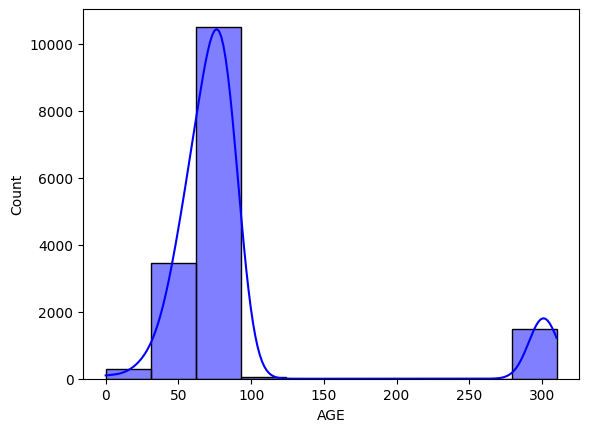

In [73]:
# @title AGE Distriburion among expired patients

sns.histplot(filtered_patients['AGE'], kde=True, bins=10, color='blue', edgecolor='black')


There are outliers in the data set, lets filter out the age above 120

<Axes: xlabel='AGE', ylabel='Count'>

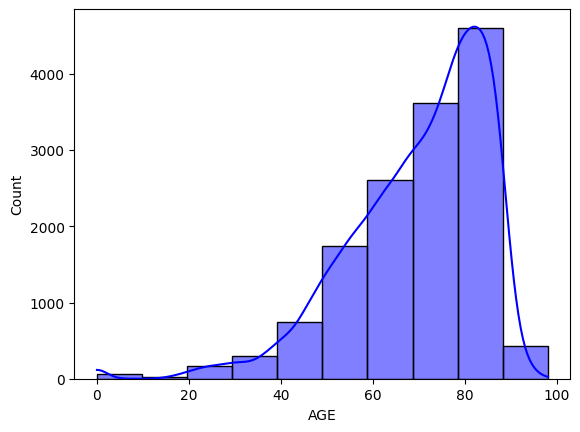

In [74]:
# @title AGE Distriburion after removing outliers
filtered_patients = filtered_patients[filtered_patients['AGE']<120]
sns.histplot(filtered_patients['AGE'], kde=True, bins=10, color='blue', edgecolor='black')


Observation
- There are patients with age 0 or very young.
- After merging with admissions table we can have more insights

<Axes: xlabel='AGE', ylabel='Density'>

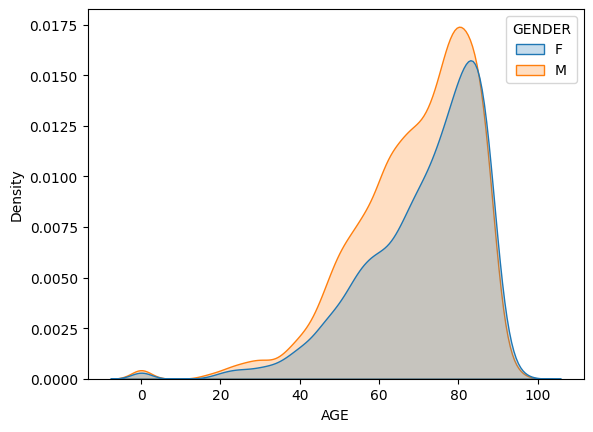

In [75]:
# @title Age Distribution of Patients by Gender
sns.kdeplot(data=filtered_patients, x="AGE", hue="GENDER", fill=True)


## Merge with admissions data

In [76]:
patients.drop(columns=['ROW_ID'],inplace=True)
admissions.drop(columns=['ROW_ID'],inplace=True)

In [77]:
patients_admissions = pd.merge(admissions,patients, on='SUBJECT_ID')
patients_admissions.describe()

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,EDREGTIME,EDOUTTIME,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
count,58976.0,58976.0,58976,58976,5854,30877,30877,58976.0,58976.0,58976,22586,15071,19069,58976.0
mean,33755.583288,149970.809584,2151-03-22 15:38:36.768516,2151-04-01 18:51:27.117811,2151-02-03 08:11:13.590708,2151-04-24 10:08:02.123910,2151-04-24 15:52:40.210512,0.099261,0.973006,2086-10-15 07:36:56.060771,2152-12-21 08:31:23.361374,2152-08-24 02:53:19.416097,2152-12-30 02:28:05.122451,0.382969
min,2.0,100001.0,2100-06-07 19:59:00,2100-06-09 17:09:00,2100-06-19 08:15:00,2100-06-07 13:14:00,2100-06-08 00:06:00,0.0,0.0,1800-07-02 00:00:00,2100-06-19 00:00:00,2100-06-19 00:00:00,2100-06-19 00:00:00,0.0
25%,11993.75,124952.75,2126-02-22 08:30:00,2126-03-04 11:33:30,2125-12-27 18:15:00,2126-04-07 01:58:00,2126-04-07 08:15:00,0.0,1.0,2062-08-14 18:00:00,2127-12-07 00:00:00,2127-08-17 00:00:00,2127-12-13 00:00:00,0.0
50%,24133.5,149989.5,2151-01-15 09:39:00,2151-01-29 16:49:30,2150-09-15 07:08:00,2150-12-12 00:32:00,2150-12-12 03:28:00,0.0,1.0,2094-06-04 00:00:00,2152-09-30 00:00:00,2152-04-02 00:00:00,2152-09-30 00:00:00,0.0
75%,53851.5,174966.5,2176-07-09 02:32:00,2176-07-19 13:30:00,2176-01-29 11:05:00,2176-08-30 03:24:00,2176-08-30 05:39:00,0.0,1.0,2122-07-22 06:00:00,2178-02-20 18:00:00,2177-09-28 00:00:00,2178-03-12 00:00:00,1.0
max,99999.0,199999.0,2210-08-17 17:13:00,2210-08-24 19:43:00,2208-02-05 11:45:00,2210-08-17 10:14:00,2210-08-17 18:25:00,1.0,1.0,2201-07-24 00:00:00,2211-06-10 00:00:00,2209-01-08 00:00:00,2211-06-10 00:00:00,1.0
std,28092.726225,28883.095213,NaN,NaN,NaN,NaN,NaN,0.299014,0.162067,NaN,NaN,NaN,NaN,0.486115


<Axes: >

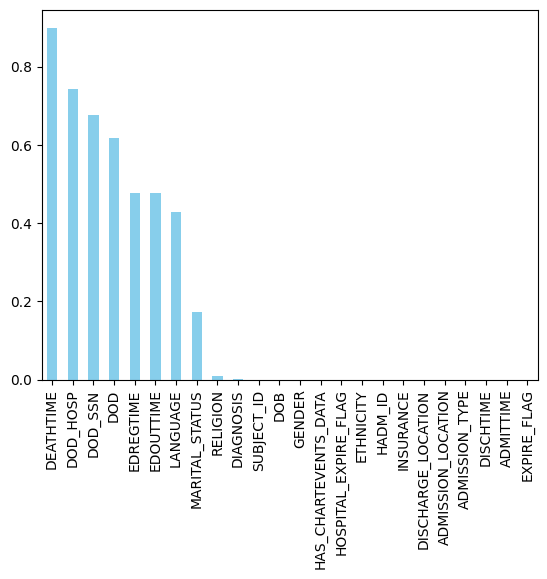

In [78]:
# @title Missing Values Plot
missing_per = patients_admissions.isnull().mean()
missing_per = missing_per.sort_values(ascending=False)
missing_per.plot(kind='bar', color='skyblue')

In [79]:
# @title Admission Duration and Age at Admission
patients_admissions['ADMISSION_DURATION'] = (patients_admissions['DISCHTIME'] - patients_admissions['ADMITTIME']).dt.days
patients_admissions['AGE_AT_ADMISSION'] = (patients_admissions['ADMITTIME'] - patients_admissions['DOB']).dt.days//365
# remove outliers from age
patients_admissions = patients_admissions[patients_admissions['AGE_AT_ADMISSION']<=120].copy()
admission_counts = admissions['SUBJECT_ID'].value_counts()
patients_admissions['ADMISSION_COUNT'] = patients_admissions['SUBJECT_ID'].map(admission_counts)
patients_admissions['AGE_AT_DEATH']=(patients_admissions['DOD']-patients_admissions['DOB']).dt.days//365

In [80]:
patients_admissions.head()

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,ADMISSION_DURATION,AGE_AT_ADMISSION,ADMISSION_COUNT,AGE_AT_DEATH
0,3115,134067,2139-02-13 03:11:00,2139-02-20 07:33:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,None,None,None,WHITE,2139-02-13 00:02:00,2139-02-13 03:22:00,STAB WOUND,0,1,M,2096-06-07,NaT,NaT,NaT,0,7,42,1,NaN
1,7124,109129,2188-07-11 00:58:00,2188-08-01 12:04:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,None,None,None,WHITE,2188-07-10 14:17:00,2188-07-11 01:52:00,PENILE LACERATION-CELLULITIS,0,1,M,2135-11-25,2188-08-02,NaT,2188-08-02,1,21,52,1,52.0
2,10348,121510,2133-04-16 21:12:00,2133-04-23 15:52:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,None,None,None,UNKNOWN/NOT SPECIFIED,2133-04-16 19:22:00,2133-04-16 22:17:00,STATUS EPILEPTICUS,0,1,F,2049-06-08,2133-06-19,NaT,2133-06-19,1,6,83,1,84.0
4,9333,133732,2167-10-06 18:35:00,2167-10-16 13:13:00,NaT,URGENT,TRANSFER FROM HOSP/EXTRAM,SNF,Private,None,None,None,UNKNOWN/NOT SPECIFIED,NaT,NaT,CORONARY ARTERY DISEASE,0,1,F,2107-03-10,NaT,NaT,NaT,0,9,60,1,NaN
5,20691,119601,2198-02-09 14:58:00,2198-02-20 15:33:00,NaT,URGENT,TRANSFER FROM HOSP/EXTRAM,SNF,Private,None,None,None,UNKNOWN/NOT SPECIFIED,NaT,NaT,+ETT\CATH,0,1,F,2131-10-14,2202-01-16,NaT,2202-01-16,1,11,66,1,70.0


In [81]:
# @title Admission Type, Location and Insurance
patients_admissions.ADMISSION_TYPE.value_counts()

,count
ADMISSION_TYPE,
EMERGENCY,39605
NEWBORN,7863
ELECTIVE,7597
URGENT,1295


In [82]:
patients_admissions.ADMISSION_LOCATION.value_counts()

,count
ADMISSION_LOCATION,
EMERGENCY ROOM ADMIT,21174
PHYS REFERRAL/NORMAL DELI,14946
CLINIC REFERRAL/PREMATURE,11446
TRANSFER FROM HOSP/EXTRAM,8199
TRANSFER FROM SKILLED NUR,217
** INFO NOT AVAILABLE **,203
HMO REFERRAL/SICK,102
TRANSFER FROM OTHER HEALT,68
TRSF WITHIN THIS FACILITY,5


In [83]:
patients_admissions.INSURANCE.value_counts()

,count
INSURANCE,
Medicare,25698
Private,22509
Medicaid,5765
Government,1782
Self Pay,606


<Axes: xlabel='ADMISSION_DURATION', ylabel='Density'>

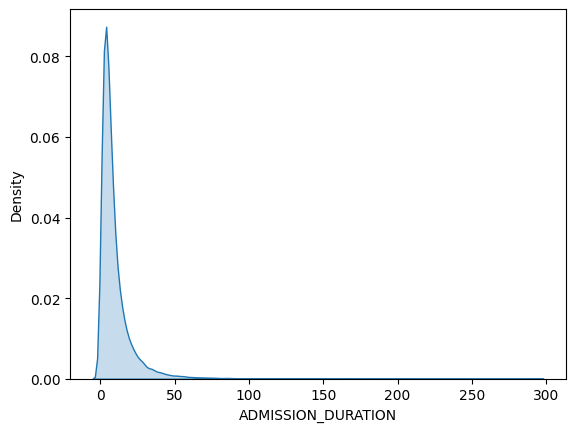

In [84]:
# @title Admission duration distributions
sns.kdeplot(data=patients_admissions, x="ADMISSION_DURATION", fill=True)

### What is the relationship between age at admission and readmission count?


In [85]:
# @title Calculate readmission
admissions_sorted = admissions.sort_values(by=['SUBJECT_ID', 'ADMITTIME'])

admissions_sorted['PREV_DISCHTIME'] = admissions_sorted.groupby('SUBJECT_ID')['DISCHTIME'].shift(1)

admissions_sorted['IS_READMISSION'] = admissions_sorted['ADMITTIME'] > admissions_sorted['PREV_DISCHTIME']
admissions_sorted['READMISSION_TIME'] = admissions_sorted['ADMITTIME'] - admissions_sorted['PREV_DISCHTIME']

admissions_sorted['READMISSION_30_DAYS'] = (admissions_sorted['ADMITTIME'] - admissions_sorted['PREV_DISCHTIME']).dt.days <= 30

columns_to_merge = ['SUBJECT_ID', 'HADM_ID', 'IS_READMISSION', 'READMISSION_30_DAYS',"READMISSION_TIME"]

# Merge those specific columns back into patients_admissions
patients_admissions_updated = pd.merge(patients_admissions, admissions_sorted[columns_to_merge], on=['SUBJECT_ID', 'HADM_ID'], how='left')


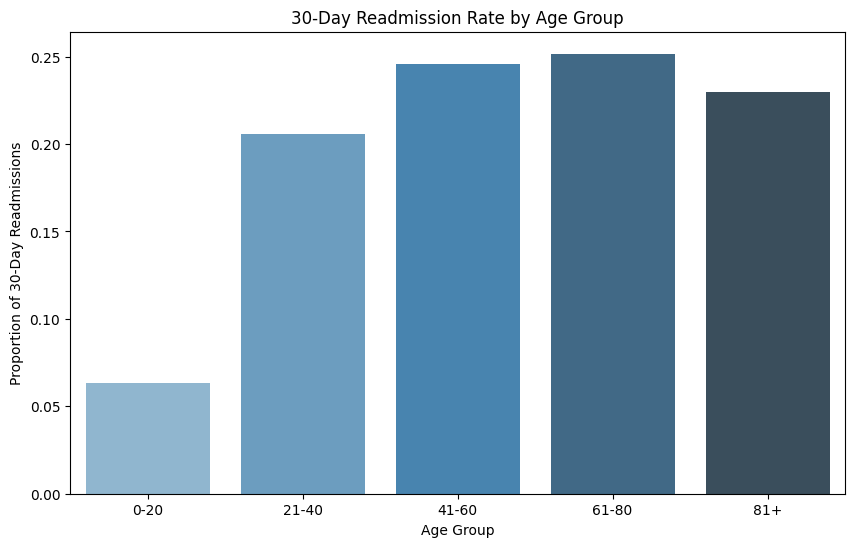

In [86]:
# @title 30-Day Readmission Rate by Age Group
# Step 1: Create age bins for visualization
age_bins = [0, 20, 40, 60, 80, 100]
age_labels = ['0-20', '21-40', '41-60', '61-80', '81+']
patients_admissions_updated['AGE_BIN'] = pd.cut(patients_admissions_updated['AGE_AT_ADMISSION'], bins=age_bins, labels=age_labels)

readmission_by_age = patients_admissions_updated.groupby('AGE_BIN', observed=True)['IS_READMISSION'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=readmission_by_age.index, y=readmission_by_age.values, hue=readmission_by_age.index, palette='Blues_d', legend=False)

plt.title('30-Day Readmission Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion of 30-Day Readmissions')

plt.show()

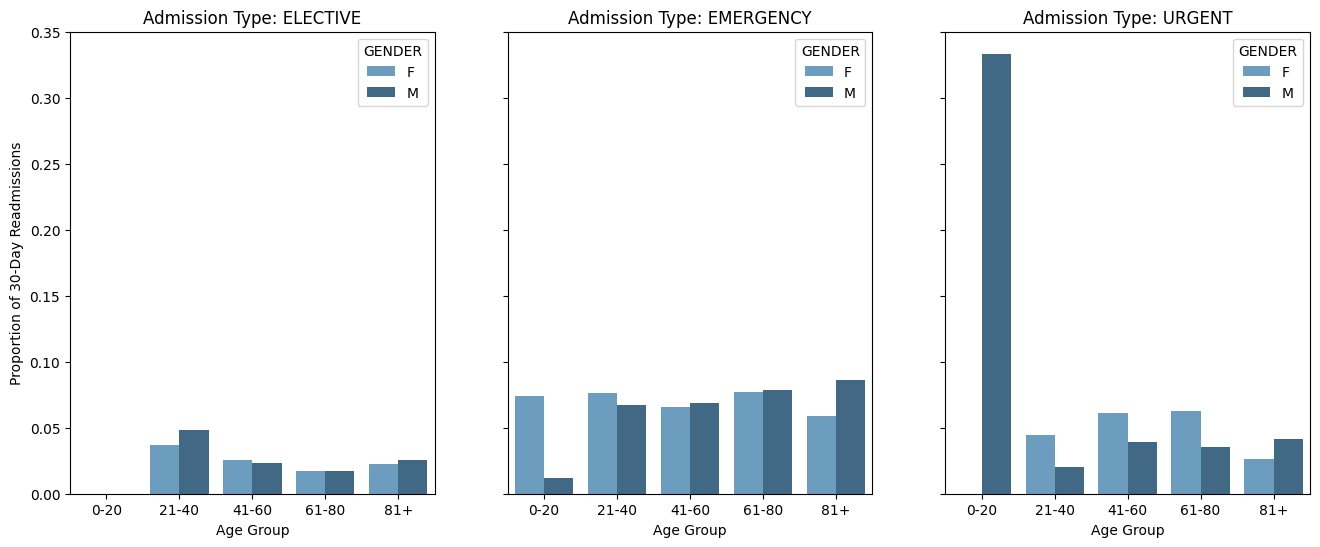

In [87]:
# @title 30-Day Readmission Rate by Gender
readmission_by_group = patients_admissions_updated.groupby(['AGE_BIN', 'GENDER', 'ADMISSION_TYPE'], observed=True)['READMISSION_30_DAYS'].mean().reset_index()

admission_types = readmission_by_group['ADMISSION_TYPE'].unique()

# Initialize the plot
fig, axes = plt.subplots(nrows=1, ncols=len(admission_types), figsize=(16, 6), sharey=True)

# Create a bar plot for each admission type
for i, admission_type in enumerate(admission_types):
    sns.barplot(x='AGE_BIN', y='READMISSION_30_DAYS', hue='GENDER', data=readmission_by_group[readmission_by_group['ADMISSION_TYPE'] == admission_type], ax=axes[i], palette='Blues_d')

    # Set titles and labels
    axes[i].set_title(f'Admission Type: {admission_type}')
    axes[i].set_xlabel('Age Group')
    if i == 0:
        axes[i].set_ylabel('Proportion of 30-Day Readmissions')

<Axes: xlabel='ADMISSION_TYPE', ylabel='ADMISSION_DURATION'>

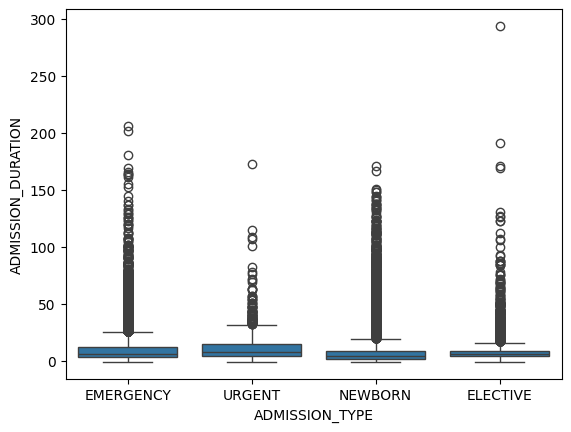

In [88]:
# @title Admission duration by admission type
sns.boxplot(x='ADMISSION_TYPE', y='ADMISSION_DURATION', data=patients_admissions_updated)


<ipython-input-89-6ff685e5c367>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-89-6ff685e5c367>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-89-6ff685e5c367>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-89-6ff685e5c367>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




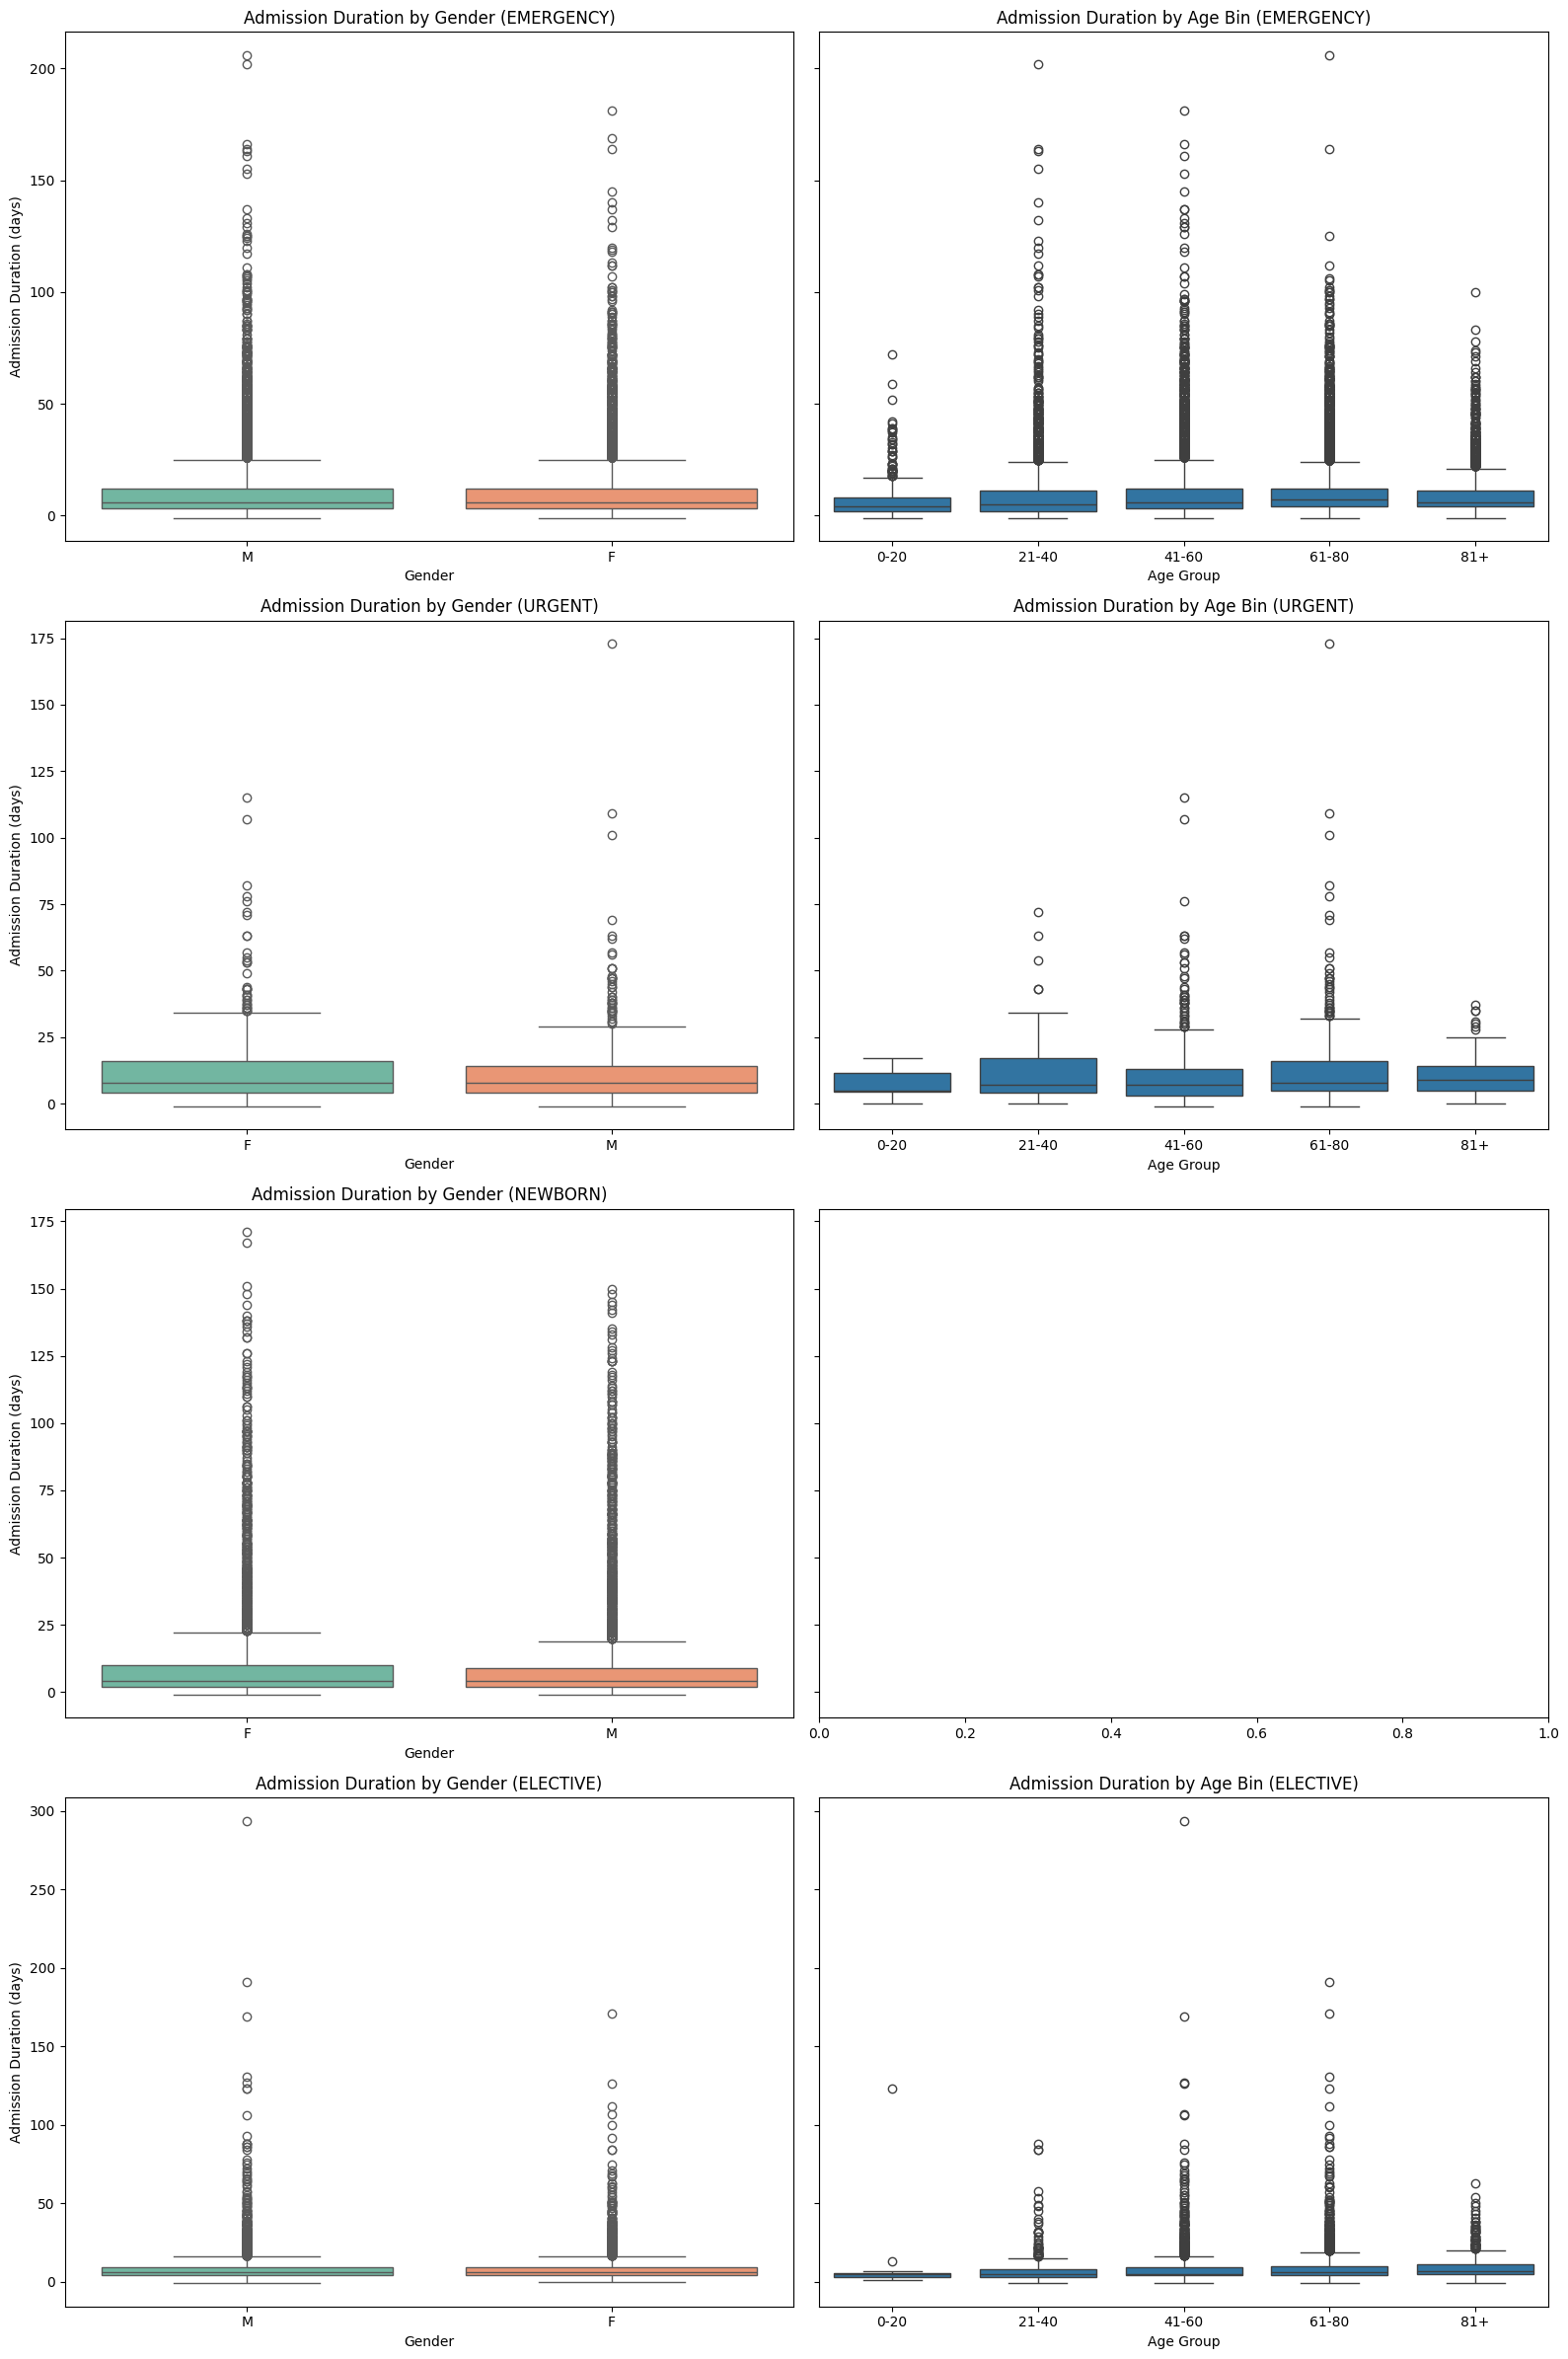

In [89]:
# @title Impact of age, gender, and admission type on Admission Duration
# Get unique admission types
admission_types = patients_admissions_updated['ADMISSION_TYPE'].unique()

# Create subplots with 1 row and 2 columns for gender and age bins, each row is for a different admission type
fig, axes = plt.subplots(nrows=len(admission_types), ncols=2, figsize=(16, 6 * len(admission_types)), sharey='row')

# Loop through each admission type and plot for both gender and age bin
for i, admission_type in enumerate(admission_types):
    # Filter the data for the current admission type
    data_filtered = patients_admissions_updated[patients_admissions_updated['ADMISSION_TYPE'] == admission_type]

    # Left subplot: Box plot for gender
    sns.boxplot(x='GENDER', y='ADMISSION_DURATION', data=data_filtered, ax=axes[i, 0], palette='Set2')
    axes[i, 0].set_title(f'Admission Duration by Gender ({admission_type})')
    axes[i, 0].set_xlabel('Gender')
    axes[i, 0].set_ylabel('Admission Duration (days)')

    # Right subplot: Box plot for age bin
    if len(data_filtered['AGE_BIN'].unique()) > 1: # Check if there are more than one unique values in 'AGE_BIN'
        sns.boxplot(x='AGE_BIN', y='ADMISSION_DURATION', data=data_filtered, ax=axes[i, 1])  # Removed palette since no hue
        axes[i, 1].set_title(f'Admission Duration by Age Bin ({admission_type})')
        axes[i, 1].set_xlabel('Age Group')
        axes[i, 1].set_ylabel('')

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plots
plt.show()

### Diagonostic Data

In [90]:
primary_diagnosis = diagnoses_icd[diagnoses_icd['SEQ_NUM'] == 1]
patients_with_primary_diagnosis = pd.merge(patients_admissions_updated, primary_diagnosis, on=['SUBJECT_ID', 'HADM_ID'], how='left')
primary_diagnosis_with_desc = pd.merge(primary_diagnosis, d_icd_diagnoses, on='ICD9_CODE', how='left')
patients_with_primary_diagnosis = pd.merge(patients_admissions_updated, primary_diagnosis_with_desc, on=['SUBJECT_ID', 'HADM_ID'], how='left')

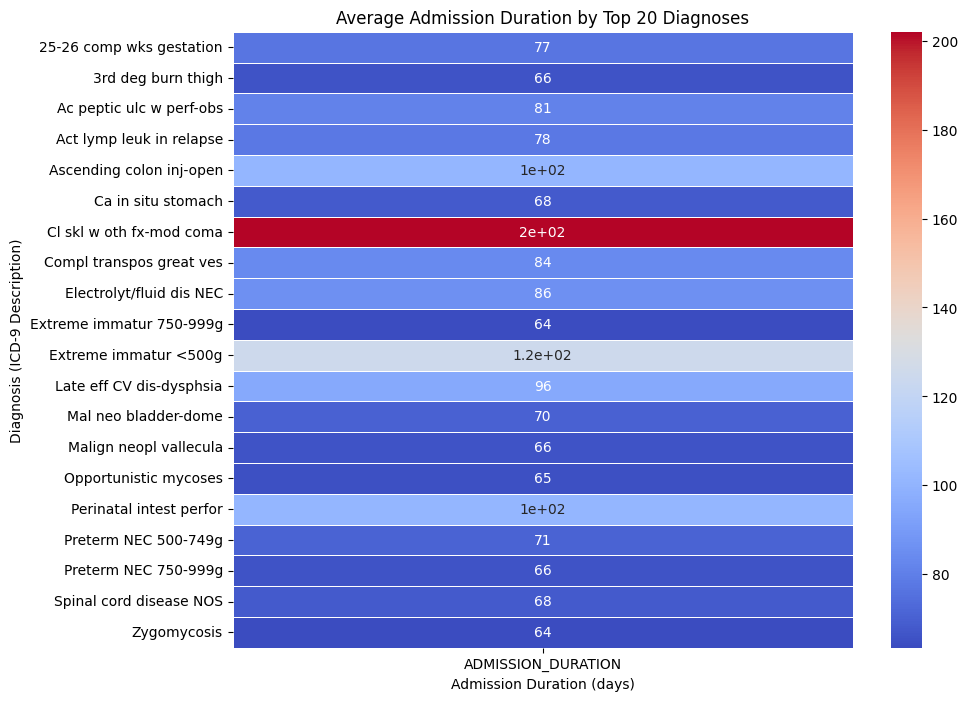

In [91]:
# @title Top 20 Diagnoses by Average Admission Duration
# Calculate the average admission duration for each diagnosis
agg_data = patients_with_primary_diagnosis.groupby('SHORT_TITLE')['ADMISSION_DURATION'].mean().reset_index()

# Sort by average admission duration and select the top 20 diagnoses for visualization
top_20_diagnoses = agg_data.sort_values(by='ADMISSION_DURATION', ascending=False).head(20)

# Pivot the data to create a format suitable for a heatmap
# use SHORT_TITLE as the index and the average admission duration as the value
heatmap_data = top_20_diagnoses.pivot_table(index='SHORT_TITLE', values='ADMISSION_DURATION')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', linewidths=.5)

# Add titles and labels
plt.title('Average Admission Duration by Top 20 Diagnoses')
plt.xlabel('Admission Duration (days)')
plt.ylabel('Diagnosis (ICD-9 Description)')

# Display the heatmap
plt.show()


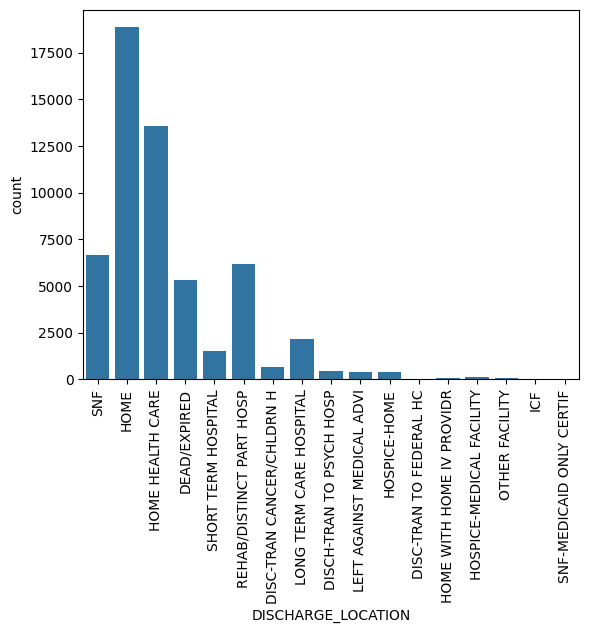

In [92]:
# @title Discharge location distribution
sns.countplot(data=patients_with_primary_diagnosis, x='DISCHARGE_LOCATION')
plt.xticks(rotation=90)  # You can change 45 to any angle as needed
plt.show()

### Load Input events dataset to get logitudanal understanding of patients after admission

In [93]:
query = f"""
    SELECT
        ie.SUBJECT_ID,
        ie.HADM_ID,
        ie.ICUSTAY_ID,
        ie.STARTTIME,
        ie.ENDTIME,
        ie.ITEMID,
        ie.AMOUNT,
        ie.PATIENTWEIGHT,
        d.ITEMID AS ITEM_DESCRIPTION
    FROM
        `physionet-data.mimiciii_clinical.inputevents_mv` AS ie
    JOIN
        `physionet-data.mimiciii_clinical.d_items` AS d
        ON ie.ITEMID = d.ITEMID
    WHERE
        ie.AMOUNT IS NOT NULL
        AND d.ITEMID IN (30051, 30101, 30120, 30125, 225158, 220955, 225828)
        """

inputevents_mv = client.query(query).to_dataframe()



In [94]:
icustay = get_data(table_name = "icustays")

In [95]:
inputevents_mv.shape

(577868, 9)

In [96]:
inputevents_icu = inputevents_mv.merge(icustay, on=['SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID'], how='inner')
inputevents_icu.drop_duplicates(inplace=True)

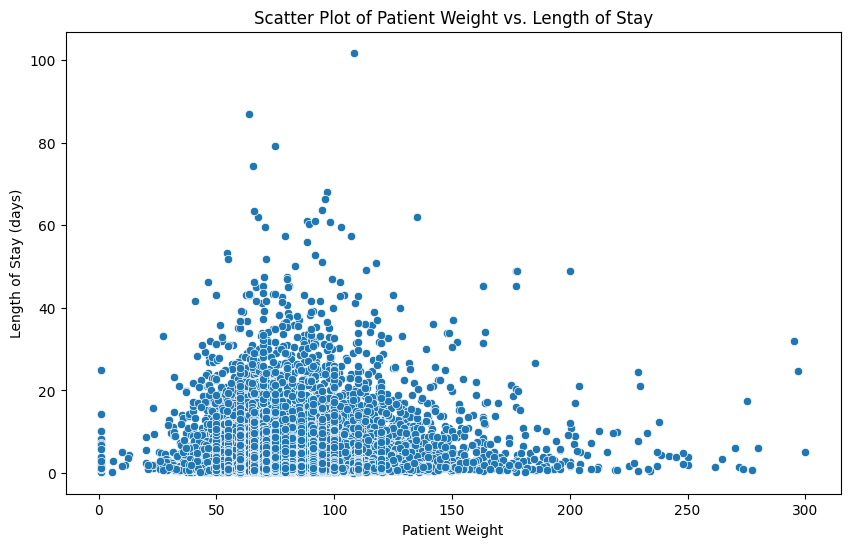

In [97]:
# @title Scatter Plot of Patient Weight vs. Length of Stay
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PATIENTWEIGHT', y='LOS', data=inputevents_icu[inputevents_icu.PATIENTWEIGHT<=300][['PATIENTWEIGHT','LOS']].drop_duplicates())
plt.title('Scatter Plot of Patient Weight vs. Length of Stay')
plt.xlabel('Patient Weight')
plt.ylabel('Length of Stay (days)')
plt.show()

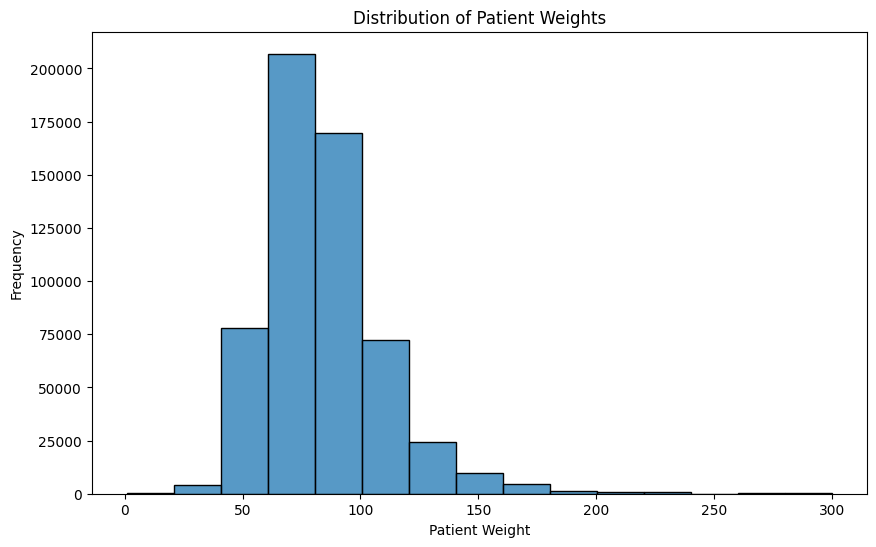

In [98]:
# @title Distribution of Patient Weights
plt.figure(figsize=(10, 6))
sns.histplot(x='PATIENTWEIGHT', data=inputevents_icu[inputevents_icu.PATIENTWEIGHT<=300], binwidth=20)
plt.title('Distribution of Patient Weights')
plt.xlabel('Patient Weight')
plt.ylabel('Frequency')
plt.show()

In [99]:
# @title Input event merged with admissions data
inputevents_patients_admission = inputevents_icu.merge(patients_admissions_updated, on=['SUBJECT_ID', 'HADM_ID'], how='inner')

## Patient flow

In [100]:
# @title Sankey Diagram
import plotly.graph_objects as go
import plotly.io as pio

# Set the default renderer to 'colab' for Google Colab
pio.renderers.default = 'colab'

# Extract necessary columns and remove duplicates
patient_data = inputevents_patients_admission[[
    'SUBJECT_ID', 'HADM_ID', 'ADMISSION_TYPE', 'FIRST_CAREUNIT', 'LAST_CAREUNIT',
    'HOSPITAL_EXPIRE_FLAG', 'DISCHARGE_LOCATION', 'READMISSION_30_DAYS'
]].drop_duplicates(subset=['SUBJECT_ID', 'HADM_ID'])

# Handle missing data
patient_data['DISCHARGE_LOCATION'].fillna('Unknown', inplace=True)
patient_data['READMISSION_30_DAYS'].fillna(False, inplace=True)
patient_data['FIRST_CAREUNIT'].fillna('Unknown', inplace=True)
patient_data['LAST_CAREUNIT'].fillna('Unknown', inplace=True)

# Create 'Outcome' and 'Readmission_Status' columns
patient_data['Outcome'] = patient_data['HOSPITAL_EXPIRE_FLAG'].map({
    0: 'Discharged Alive',
    1: 'Died in Hospital'
})

patient_data['Readmission_Status'] = patient_data['READMISSION_30_DAYS'].map({
    True: 'Readmitted within 30 Days',
    False: 'Not Readmitted within 30 Days'
})

# Generate edges for each step in the flow

# Edge from Admission Type to First Care Unit
edges1 = patient_data.groupby(['ADMISSION_TYPE', 'FIRST_CAREUNIT']).size().reset_index(name='count')
edges1['source'] = edges1['ADMISSION_TYPE']
edges1['target'] = edges1['FIRST_CAREUNIT']

# Edge from First Care Unit to Last Care Unit
edges2 = patient_data.groupby(['FIRST_CAREUNIT', 'LAST_CAREUNIT']).size().reset_index(name='count')
edges2['source'] = edges2['FIRST_CAREUNIT']
edges2['target'] = edges2['LAST_CAREUNIT']

# Edge from Last Care Unit to Outcome
edges3 = patient_data.groupby(['LAST_CAREUNIT', 'Outcome']).size().reset_index(name='count')
edges3['source'] = edges3['LAST_CAREUNIT']
edges3['target'] = edges3['Outcome']

# Edge from Outcome to Discharge Location (only for 'Discharged Alive')
edges4 = patient_data[patient_data['Outcome'] == 'Discharged Alive'].groupby(['Outcome', 'DISCHARGE_LOCATION']).size().reset_index(name='count')
edges4['source'] = edges4['Outcome']
edges4['target'] = edges4['DISCHARGE_LOCATION']

# Edge from Discharge Location to Readmission Status
edges5 = patient_data[patient_data['Outcome'] == 'Discharged Alive'].groupby(['DISCHARGE_LOCATION', 'Readmission_Status']).size().reset_index(name='count')
edges5['source'] = edges5['DISCHARGE_LOCATION']
edges5['target'] = edges5['Readmission_Status']

# Combine all edges
edges = pd.concat([
    edges1[['source', 'target', 'count']],
    edges2[['source', 'target', 'count']],
    edges3[['source', 'target', 'count']],
    edges4[['source', 'target', 'count']],
    edges5[['source', 'target', 'count']]
], ignore_index=True)

# Prepare labels and indices for the Sankey diagram
# Create a list of unique labels
labels = list(pd.unique(edges[['source', 'target']].values.ravel('K')))

# Create a mapping from label to index
label_to_index = {label: idx for idx, label in enumerate(labels)}

# Map source and target labels to indices
edges['source_id'] = edges['source'].map(label_to_index)
edges['target_id'] = edges['target'].map(label_to_index)

# Assign colors to nodes
import matplotlib.colors as mcolors

# Generate a color palette
color_palette = list(mcolors.CSS4_COLORS.keys())

# Assign colors to nodes
node_colors = []
for label in labels:
    if label in patient_data['ADMISSION_TYPE'].unique():
        node_colors.append('deepskyblue')
    elif label in patient_data['FIRST_CAREUNIT'].unique():
        node_colors.append('lightgreen')
    elif label in patient_data['LAST_CAREUNIT'].unique():
        node_colors.append('orange')
    elif label in patient_data['Outcome'].unique():
        node_colors.append('tomato')
    elif label in patient_data['DISCHARGE_LOCATION'].unique():
        node_colors.append('violet')
    elif label in patient_data['Readmission_Status'].unique():
        node_colors.append('gold')
    else:
        # Assign a default color
        node_colors.append('grey')

# Assign colors to links

link_colors = []
for _, row in edges.iterrows():
    source_label = row['source']
    source_color = node_colors[label_to_index[source_label]]
    link_colors.append(source_color)

# Create the Sankey diagram using Plotly
fig = go.Figure(data=[go.Sankey(
    valueformat = ".0f",
    valuesuffix = " Patients",
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = "black", width = 0.5),
        label = labels,
        color = node_colors
    ),
    link = dict(
        source = edges['source_id'],
        target = edges['target_id'],
        value = edges['count'],
        color = link_colors
    )
)])

# Update the layout
fig.update_layout(
    title_text="Patient Flow from Admission to Outcome",
    font_size=10,
    height=700,
    width=1100
)

# Display the figure
fig.show(renderer='colab')



In [101]:
fig.write_html("sankey_diagram.html")

## Kideny patient analysis

In [ ]:
diagnoses_icd_with_dec = diagnoses_icd.merge(d_icd_diagnoses, on='ICD9_CODE', how='inner')

In [ ]:
  query = f"""
  SELECT *
  FROM `abhishek-project-001.mimic_data_prep.renal_comorbidities_with_primary`
  where PRIMARY_DIAGNOSIS is not NULL
  """
  df = client.query(query).to_dataframe()

In [ ]:
df['rank'] = df.groupby('PRIMARY_ICD9_CODE')['COMORBIDITY_COUNT'].rank(ascending=False, method='first')

In [ ]:
plot_df = df[df['rank']<5]

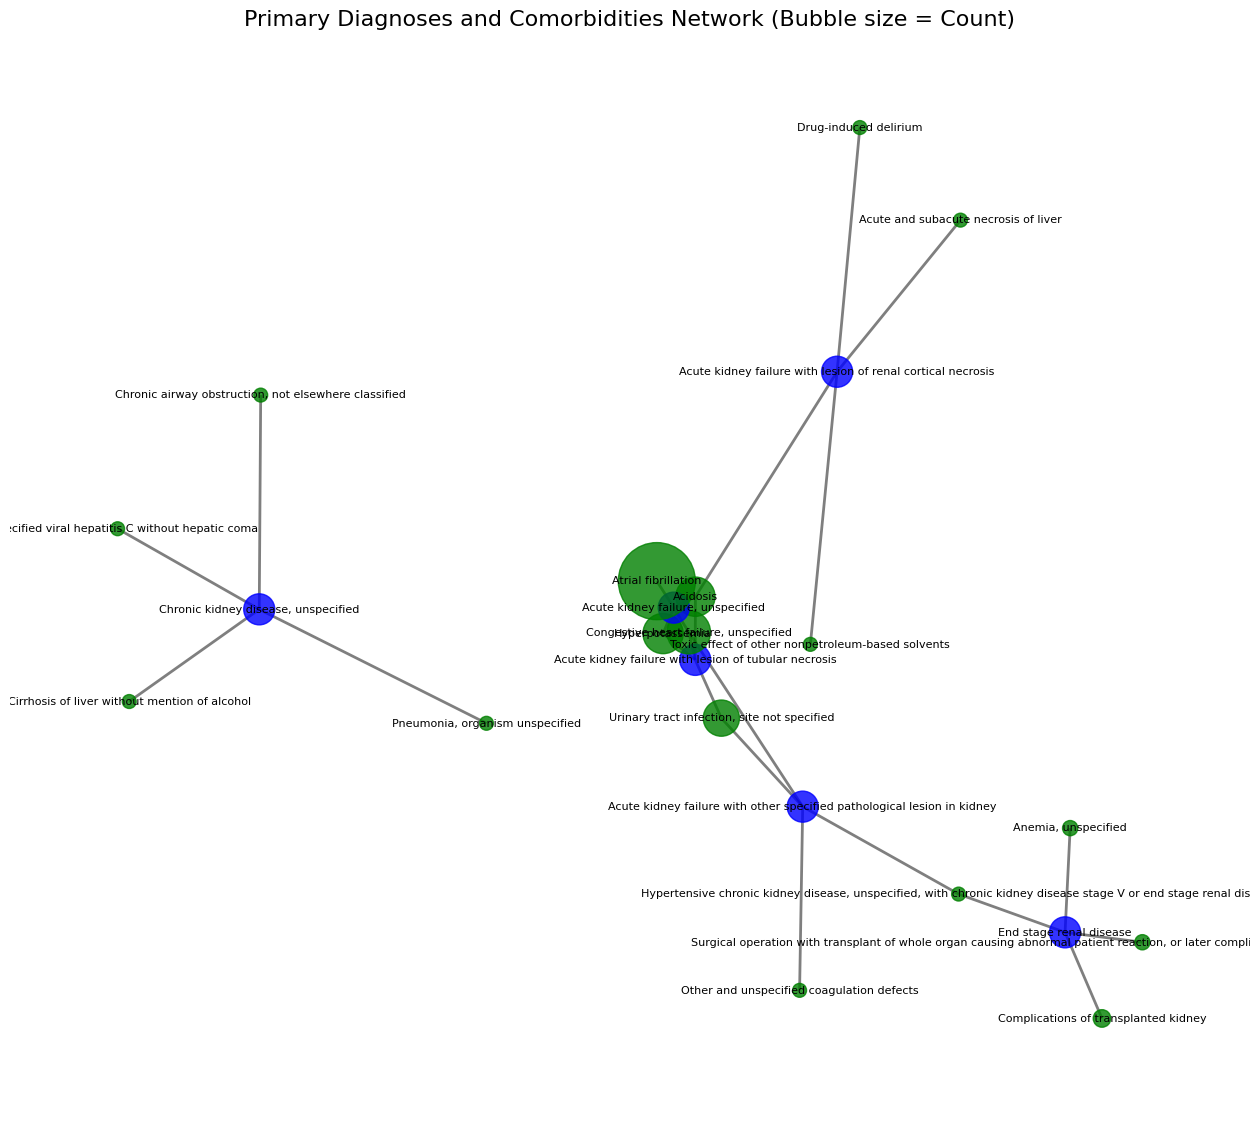

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a new graph object
G = nx.Graph()

# Set a fixed random seed to ensure layout consistency
random_seed = 42

# Iterate through the DataFrame to add nodes and edges
for _, row in plot_df.iterrows():
    primary = row['PRIMARY_DIAGNOSIS']
    comorbidity = row['COMORBIDITY_DIAGNOSIS']
    count = row['COMORBIDITY_COUNT']

    # Add the primary diagnosis as a node (ensure it exists)
    if not G.has_node(primary):
        G.add_node(primary, size=500, color='blue')

    # Add the comorbidity diagnosis as a node with size proportional to the count
    if not G.has_node(comorbidity):
        G.add_node(comorbidity, size=max(count * 20, 100), color='green')

    # Add an edge between the primary diagnosis and the comorbidity
    G.add_edge(primary, comorbidity, weight=count)

# Get the positions of the nodes using spring layout (with fixed random seed for consistency)
pos = nx.spring_layout(G, k=1.5, iterations=200, seed=random_seed)

# Get the size and color attributes of the nodes
node_sizes = [G.nodes[node]['size'] for node in G.nodes()]
node_colors = [G.nodes[node]['color'] for node in G.nodes()]

# Draw the network graph
plt.figure(figsize=(16, 14))  # Increase the figure size for readability

# Draw the nodes with proper size and color
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.8)

# Draw the edges with adjusted width based on weight
nx.draw_networkx_edges(G, pos, width=2, alpha=0.5)


nx.draw_networkx_labels(G, pos, font_size=8)

# Set plot title
plt.title('Primary Diagnoses and Comorbidities Network (Bubble size = Count)', fontsize=16)
plt.axis('off')
plt.show()


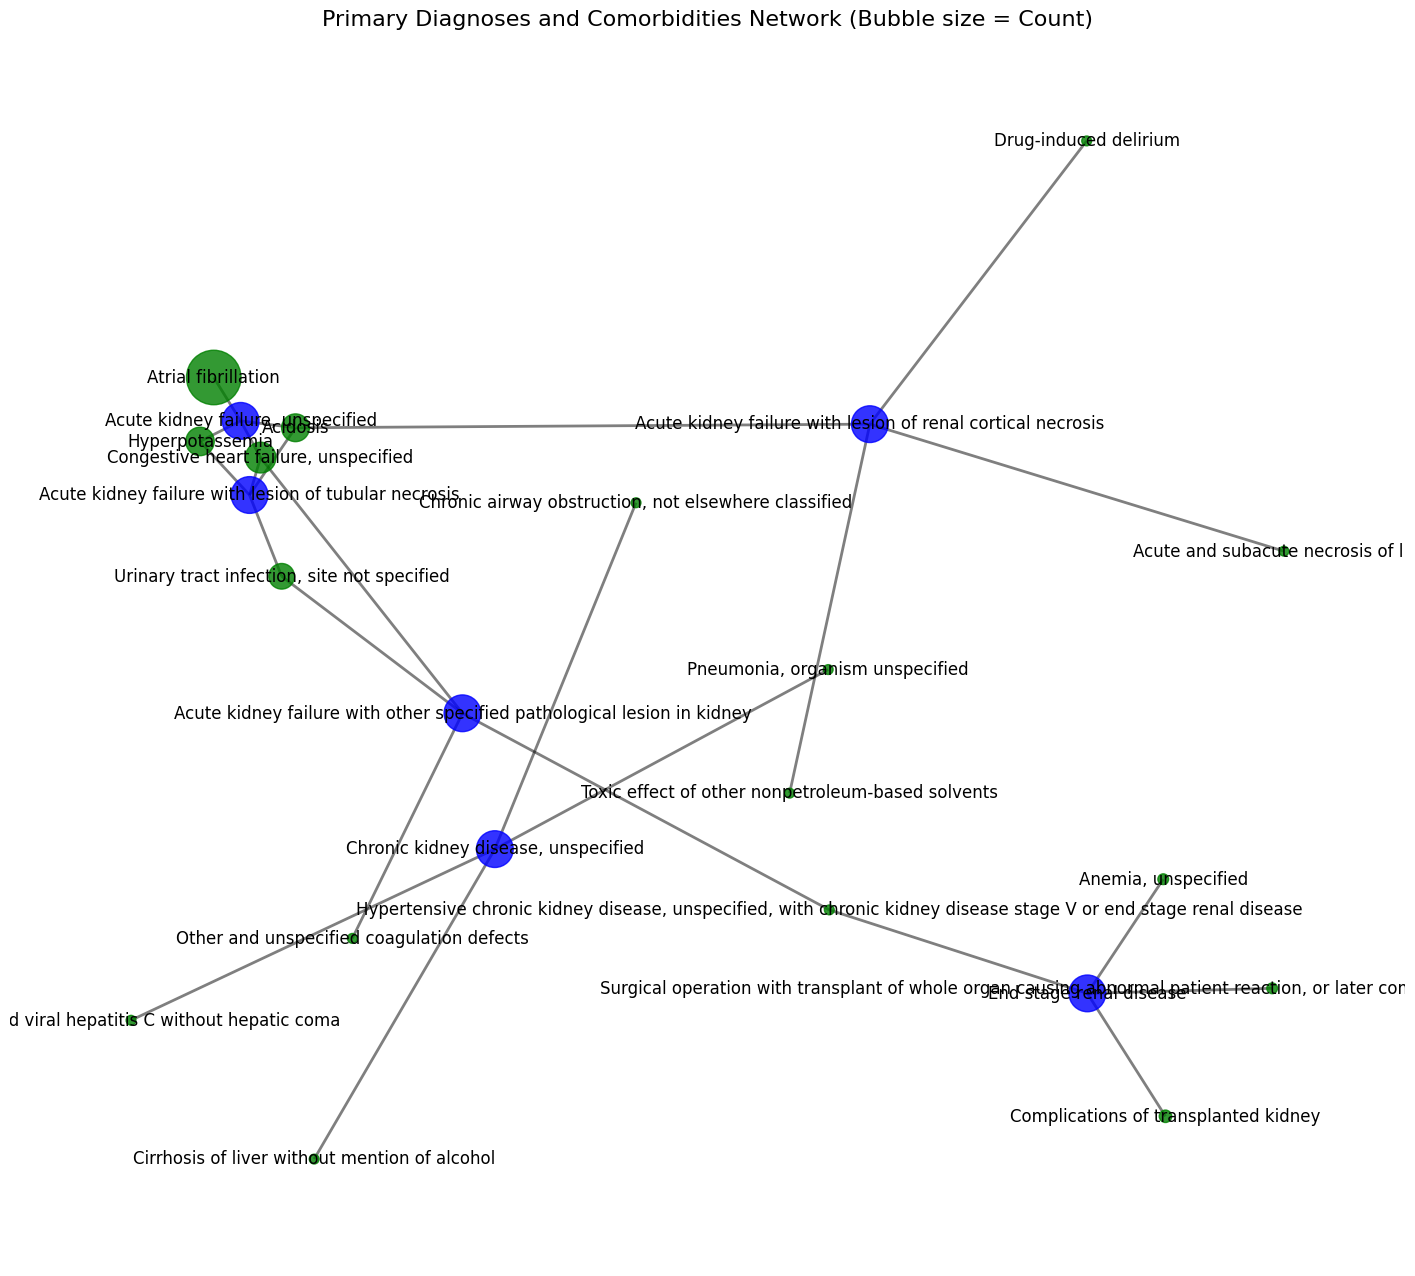

In [ ]:


# Create a new graph object
G = nx.Graph()

# Set a fixed random seed to ensure layout consistency
random_seed = 42

# Iterate through the DataFrame to add nodes and edges
for _, row in plot_df.iterrows():
    primary = row['PRIMARY_DIAGNOSIS']
    comorbidity = row['COMORBIDITY_DIAGNOSIS']
    count = row['COMORBIDITY_COUNT']

    # Add the primary diagnosis as a node (ensure it exists)
    if not G.has_node(primary):  # Only add if it's not already in the graph
        G.add_node(primary, size=700, color='blue',font_color="red")  # Larger size for primary diagnosis

    # Add the comorbidity diagnosis as a node with size proportional to the count
    if not G.has_node(comorbidity):
        G.add_node(comorbidity, size=max(count * 10, 50), color='green')  # Smaller size for comorbidities

    # Add an edge between the primary diagnosis and the comorbidity
    G.add_edge(primary, comorbidity, weight=count)

# Get the positions of the nodes using spring layout (with fixed random seed and higher k for spacing)
pos = nx.spring_layout(G, k=3.0, iterations=300, seed=random_seed)  # Increased k value and iterations for better spacing

# Get the size and color attributes of the nodes
node_sizes = [G.nodes[node]['size'] for node in G.nodes()]
node_colors = [G.nodes[node]['color'] for node in G.nodes()]

# Draw the network graph
plt.figure(figsize=(18, 16))  # Further increase the figure size for readability

# Draw the nodes with proper size and color
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.8)

# Draw the edges with adjusted width based on weight
nx.draw_networkx_edges(G, pos, width=2, alpha=0.5)

# Draw the labels with increased font size for better readability
nx.draw_networkx_labels(G, pos, font_size=12,font_family='sans-serif')

# Set plot title
plt.title('Primary Diagnoses and Comorbidities Network (Bubble size = Count)', fontsize=16)
plt.axis('off')  # Turn off the axis for better visual aesthetics
plt.show()


In [ ]:
import plotly.io as pio
pio.renderers.default = 'colab'


In [ ]:
import networkx as nx
import plotly.graph_objects as go

# Create a new graph object
G = nx.Graph()


random_seed = 42

# Iterate through the DataFrame to add nodes and edges
for _, row in plot_df.iterrows():
    primary = row['PRIMARY_DIAGNOSIS']
    comorbidity = row['COMORBIDITY_DIAGNOSIS']
    count = row['COMORBIDITY_COUNT']

    # Add the primary diagnosis as a node (ensure it exists)
    if not G.has_node(primary):
        G.add_node(primary, size=50, color='white', font_color='brown')

    # Add the comorbidity diagnosis as a node with size proportional to the count
    if not G.has_node(comorbidity):
        G.add_node(comorbidity, size=min(max(count * 2, 10), 50), color='darkslategray', font_color='black')

    # Add an edge between the primary diagnosis and the comorbidity
    G.add_edge(primary, comorbidity, weight=count)

# Increase the k value and iterations for more spacing between nodes
pos = nx.spring_layout(G, k=3.0, iterations=300, seed=random_seed)  # Increase k and iterations for better separation

# Extract edge coordinates for Plotly
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)  # Separate edges
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

# Create edge traces for Plotly
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=1, color='#888'),  # Reduce line width
    hoverinfo='none',
    mode='lines')

# Extract node coordinates and sizes for Plotly
node_x = []
node_y = []
node_size = []
node_text = []
node_color = []
node_font_color = []

for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_size.append(G.nodes[node]['size'])  # Adjust node sizes
    node_text.append(node)
    node_color.append(G.nodes[node]['color'])
    node_font_color.append(G.nodes[node].get('font_color', 'black'))

# Create node traces for Plotly
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    hoverinfo='text',
    text=node_text,  # Hover text with node names
    textfont=dict(color=node_font_color),  # Use the customized font colors
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=node_size,  # Adjusted size of the nodes
        color=node_color,  # Color of nodes
        colorbar=dict(
            thickness=15,
            title='Node Size',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

# Create Plotly figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='<br>Interactive Network: Primary Diagnoses and Comorbidities',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=40, l=40, r=40, t=40),  # Adjust margins
                    annotations=[dict(
                        text="Interactive network showing comorbidities for primary diagnoses.",
                        showarrow=False,
                        xref="paper", yref="paper",
                        x=0.005, y=-0.002)],
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )

# Show the interactive plot
fig.show()


In [ ]:
query = f"""
SELECT *
FROM `abhishek-project-001.mimic_data_prep.renal_patients_prescription_lab`

"""
renal_patients_prescription_lab = client.query(query).to_dataframe()

In [ ]:
renal_patients_prescription_dedup = renal_patients_prescription_lab[['SUBJECT_ID','HADM_ID','SHORT_TITLE','ADMISSION_TYPE','INSURANCE','DIAGNOSIS','DRUG','FORM_UNIT_DISP']].drop_duplicates()

In [ ]:
renal_patients_prescription_dedup.head()

,SUBJECT_ID,HADM_ID,SHORT_TITLE,ADMISSION_TYPE,INSURANCE,DIAGNOSIS,DRUG,FORM_UNIT_DISP
0,93325,141697,"Ac kidny fail, tubr necr",EMERGENCY,Private,ASCITES;HYPERKALEMIA,CeftriaXONE,BAG
1,93325,141697,"Ac kidny fail, tubr necr",EMERGENCY,Private,ASCITES;HYPERKALEMIA,Norepinephrine,AMP
2,93325,141697,"Ac kidny fail, tubr necr",EMERGENCY,Private,ASCITES;HYPERKALEMIA,Rifaximin,TAB
3,93325,141697,"Ac kidny fail, tubr necr",EMERGENCY,Private,ASCITES;HYPERKALEMIA,Heparin Flush (10 units/ml),SYR
6,93325,141697,"Ac kidny fail, tubr necr",EMERGENCY,Private,ASCITES;HYPERKALEMIA,Pantoprazole,TAB


In [ ]:
drug_by_diagnosis = renal_patients_prescription_dedup.groupby(['DIAGNOSIS', 'DRUG']).size().reset_index(name='count')


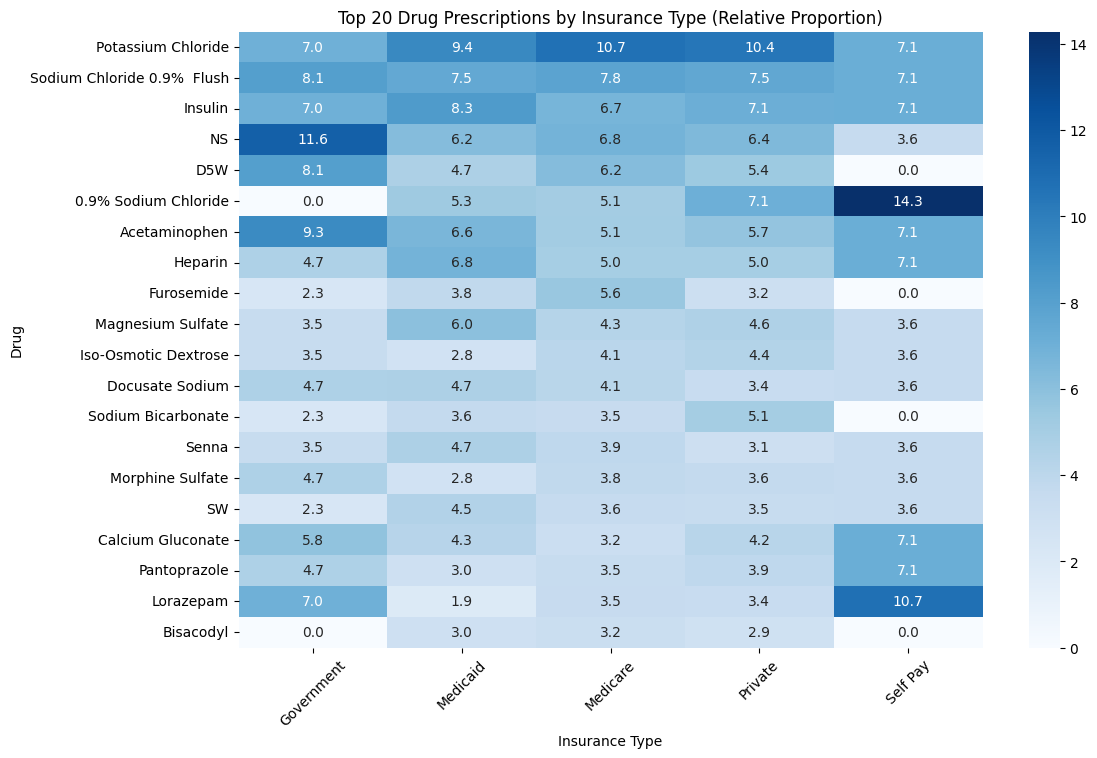

In [ ]:
top_n = 20
top_drugs = renal_patients_prescription_dedup['DRUG'].value_counts().nlargest(top_n).index

drug_by_insurance = renal_patients_prescription_dedup.pivot_table(index='DRUG', columns='INSURANCE', aggfunc='size', fill_value=0)

filtered_drug_by_insurance = drug_by_insurance.loc[top_drugs]

drug_by_insurance_normalized = filtered_drug_by_insurance.div(filtered_drug_by_insurance.sum(axis=0), axis=1) * 100

plt.figure(figsize=(12, 8))
sns.heatmap(drug_by_insurance_normalized, cmap='Blues', annot=True, fmt='.1f')
plt.title(f'Top {top_n} Drug Prescriptions by Insurance Type (Relative Proportion)')
plt.xlabel('Insurance Type')
plt.ylabel('Drug')
plt.xticks(rotation=45)
plt.show()


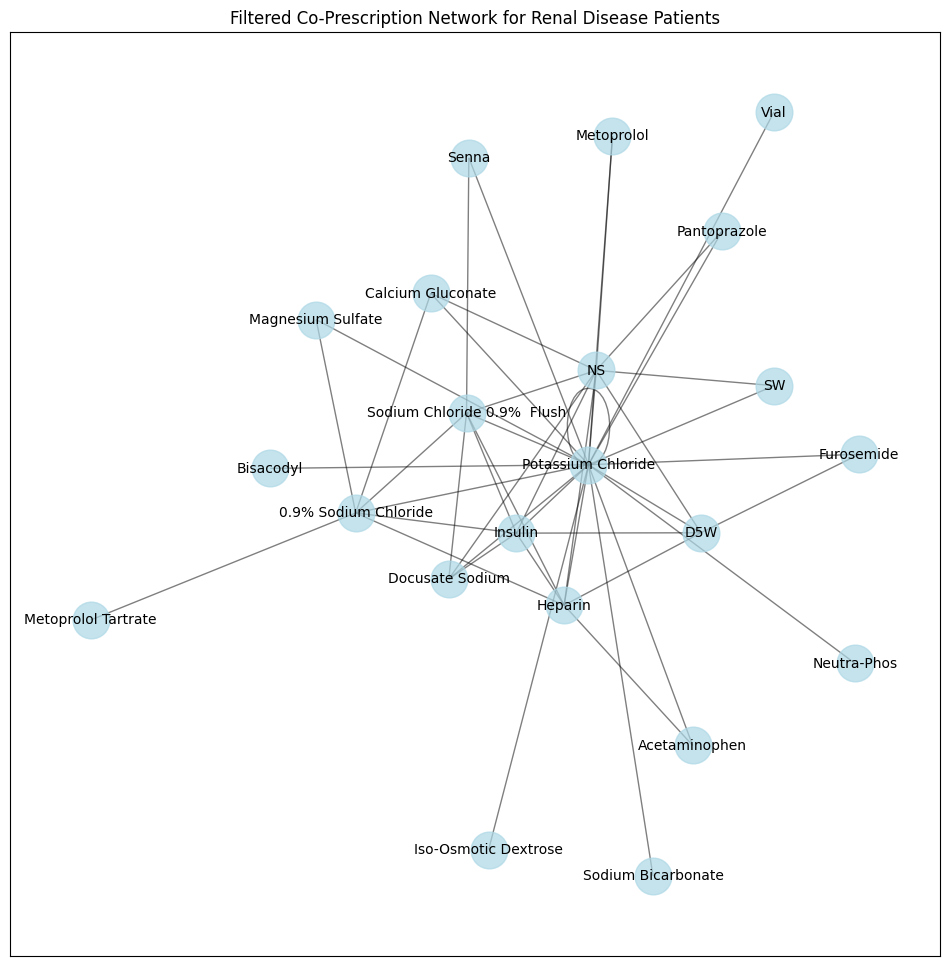

In [ ]:
from itertools import combinations
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Get unique combinations of drugs prescribed to the same patient (SUBJECT_ID and HADM_ID)
drug_combinations = renal_patients_prescription_dedup.groupby(['SUBJECT_ID', 'HADM_ID'])['DRUG'].apply(lambda x: list(combinations(x, 2))).explode()

# Count the number of occurrences of each combination
combination_counts = drug_combinations.value_counts().reset_index(name='count')
combination_counts.columns = ['combo', 'count']

# Filter to only include combinations that occur more than a threshold number of times
threshold = 150  # Set a threshold for frequently co-prescribed drugs
frequent_combinations = combination_counts[combination_counts['count'] >= threshold]

# Create a co-prescription network
G = nx.Graph()
for combo in frequent_combinations['combo']:
    G.add_edge(combo[0], combo[1])

# Plot network (limiting node size and using a layout for better readability)
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5, iterations=50)  # Adjust 'k' for more spacing
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue', alpha=0.7)
nx.draw_networkx_edges(G, pos, width=1, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
plt.title('Filtered Co-Prescription Network for Renal Disease Patients')
plt.show()
